In [1]:
# Exercise 3: Decision Boundary

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression

In [4]:
# 1 Dimension

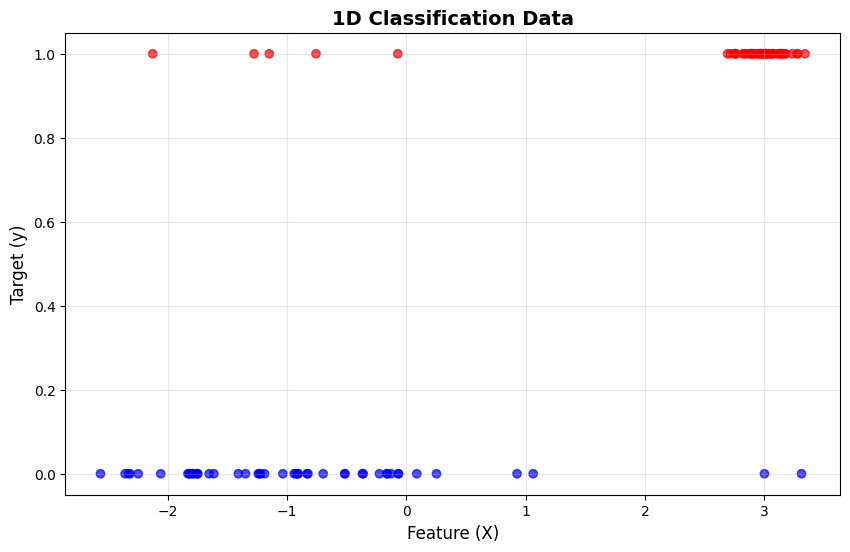

In [30]:
# Generate 1D data
X, y = make_classification(
    n_samples=100,
    n_features=1,
    n_informative=1,
    n_redundant=0,
    n_repeated=0,
    n_classes=2,
    n_clusters_per_class=1,
    weights=[0.5, 0.5],
    flip_y=0.15,
    class_sep=2.0,
    hypercube=True,
    shift=1.0,
    scale=1.0,
    shuffle=True,
    random_state=88
)

# 1. Plot the data
# Reshape X
X_flat = X.reshape(-1)

# Plot original data
plt.figure(figsize=(10, 6))
plt.scatter(X_flat, y, alpha=0.7, c=y, cmap='bwr')
plt.xlabel('Feature (X)', fontsize=12)
plt.ylabel('Target (y)', fontsize=12)
plt.title('1D Classification Data', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.show()


In [31]:
# Fit Logistic regression
model_1d = LogisticRegression()
model_1d.fit(X, y)

print("Coefficient:", model_1d.coef_)
print("Intercept:", model_1d.intercept_)

Coefficient: [[1.18885765]]
Intercept: [-0.98497516]


In [32]:
# Plot with fitted sigmoid

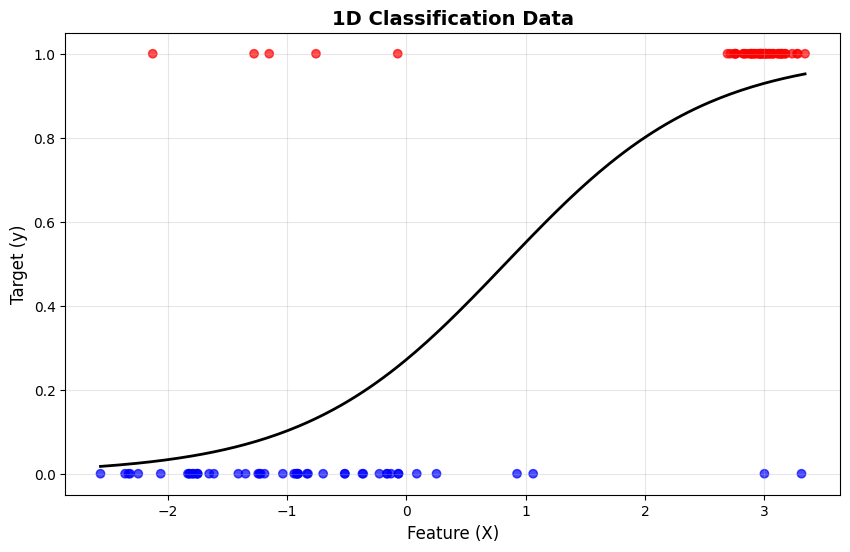

In [33]:
# generate smooth curve
x_values = np.linspace(X_flat.min(), X_flat.max(), 200).reshape(-1, 1)

# predicted probabilities
y_probs = model_1d.predict_proba(x_values)[:, 1]

plt.figure(figsize=(10, 6))
plt.scatter(X_flat, y, alpha=0.7, c=y, cmap='bwr')
plt.plot(x_values, y_probs, color="black", label="Fitted Sigmoid", linewidth=2)
plt.xlabel('Feature (X)', fontsize=12)
plt.ylabel('Target (y)', fontsize=12)
plt.title('1D Classification Data', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.show()